In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from collections import Counter

In [2]:
data=pd.read_csv("kaggle-survey-2018/multipleChoiceResponses.csv")
preguntas=data.iloc[:1]
data = data.iloc[1:]

/srv/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data=data[data["Q3"]!="I do not wish to disclose my location"]
a=Counter(data["Q3"])

In [7]:
a['United States'] = a.pop("United States of America")
a["United Kingdom"] = a.pop("United Kingdom of Great Britain and Northern Ireland")
a["Iran, Islamic Rep."] = a.pop("Iran, Islamic Republic of...")
a["Hong Kong SAR, China"] = a.pop("Hong Kong (S.A.R.)")
a["Korea, Dem. People’s Rep."] = a.pop("Republic of Korea")
a["Korea, Rep."] = a.pop("South Korea")
poblacion=pd.read_csv("https://raw.githubusercontent.com/datasets/population/master/data/population.csv")
population=poblacion.iloc[2624:]
population=population[population["Year"]==2016]

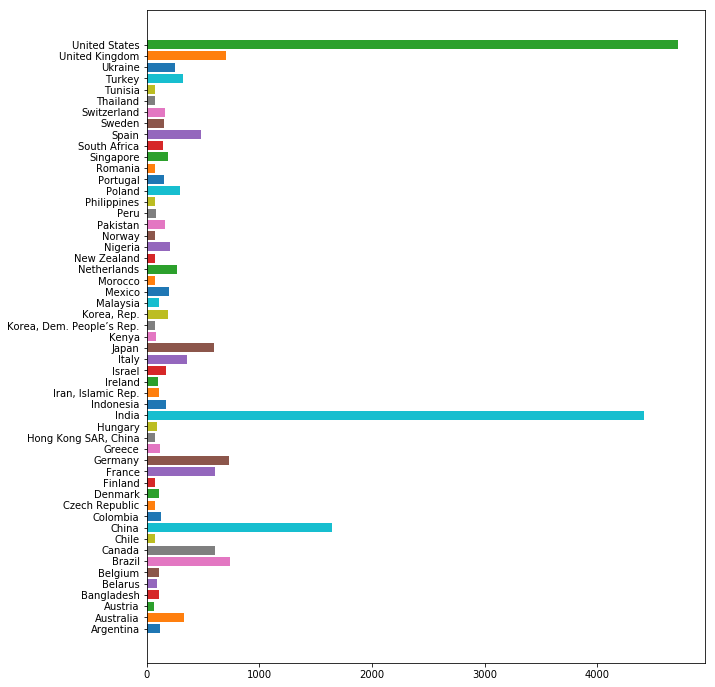

In [8]:
plt.figure(figsize=(10,12))
for i in population["Country Name"]:
    if i in a:
        plt.barh(i,a[i])
plt.show()  

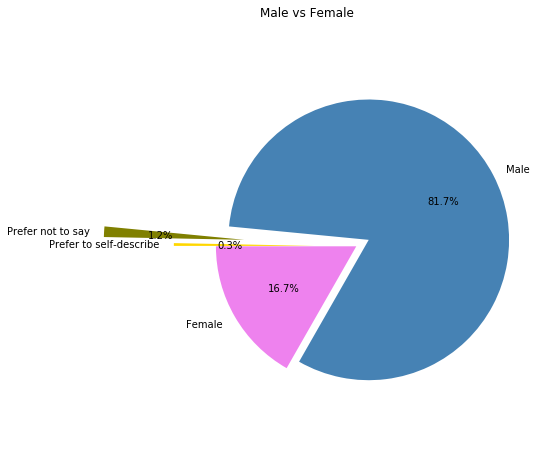

In [61]:
total=len(data)
labels=[]
values=[]
plt.figure(figsize=(8,8))
for i in sorted(Counter(data["Q1"])):
    labels.append(i)
    values.append(Counter(data["Q1"])[i])
colors=["violet","steelblue","olive","gold"]
explode = (0, 0.1, 0.8, 0.3)
plt.pie(values,labels=labels,shadow=False,colors=colors,explode=explode,startangle=180,autopct='%1.1f%%')
plt.axis("equal")
plt.title("Male vs Female")
plt.show()

In [85]:
def plotting_male_vs_female(data,title):
    total= len(data)
    labels=[]
    values=[]
    plt.figure(figsize=(8,8))
    for i in sorted(Counter(data)):
        labels.append(i)
        values.append(Counter(data)[i])
    colors=["violet","steelblue","olive","gold"]
    explode = (0, 0.1, 0.8, 0.3)
    plt.pie(values,labels=labels,shadow=False,colors=colors,explode=explode,startangle=180,autopct='%1.1f%%')
    plt.axis("equal")
    plt.title("Male Vs Female in "+title)
    plt.show()

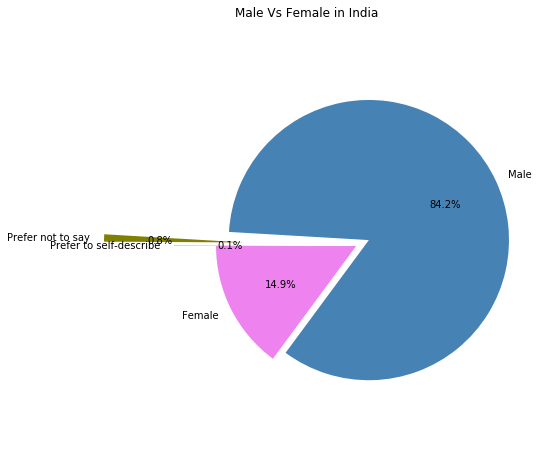

In [86]:
datos_India=data[data.Q3=="India"]
plotting_male_vs_female(datos_India.Q1,"India")

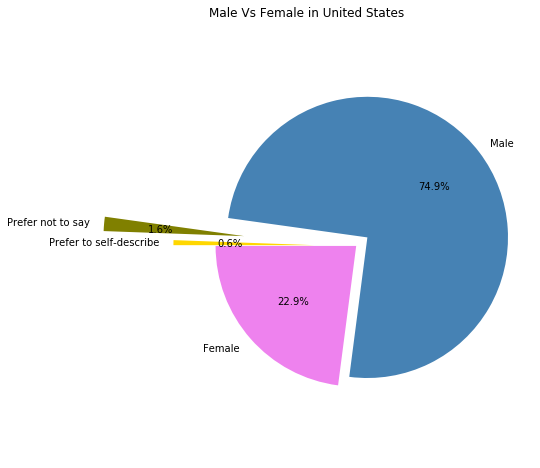

In [87]:
datos_USA=data[data.Q3=="United States of America"]
plotting_male_vs_female(datos_USA.Q1,"United States")

In [97]:
def plot_Lat_america(data):
    total= len(data)
    labels=[]
    values=[]
    for i in sorted(Counter(data)):
        labels.append(i)
        values.append(Counter(data)[i])
    return labels, values


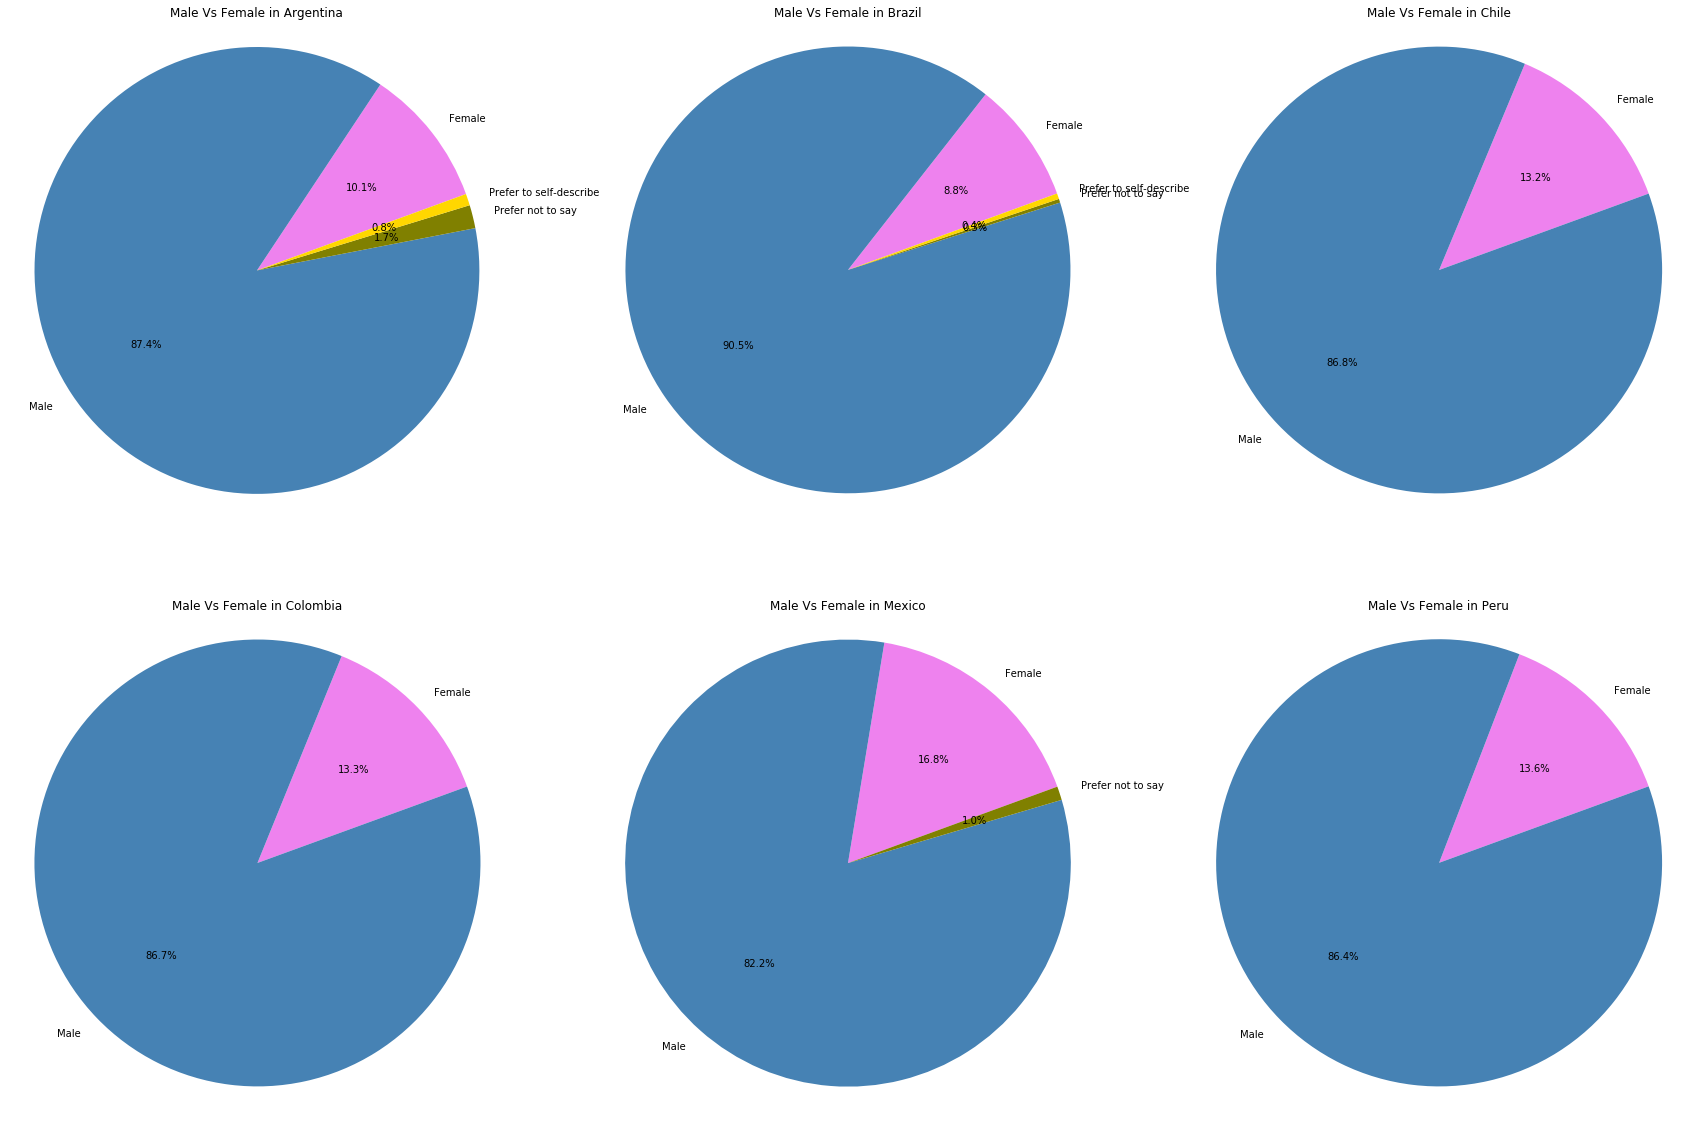

In [101]:
plt.figure(figsize=(30,20))
Lat_american=["Argentina","Brazil","Chile","Colombia","Mexico","Peru"]
k=1
for i in Lat_american:
    datos_lat=data[data.Q3==i]
    labels,values=plot_Lat_america(datos_lat.Q1)
    colors=["violet","steelblue","olive","gold"]
    plt.subplot(2,3,k)
    plt.pie(values,labels=labels,shadow=False,colors=colors,startangle=20,autopct='%1.1f%%')
    plt.axis("equal")
    plt.title("Male Vs Female in "+i)
    k+=1
plt.show()